In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load the data
data = pd.read_csv('data\cleaned_data.csv')
print(data.head())

       id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast              director  \
0  ['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...   ['Colin Trevorrow']   
1  ['Tom Hardy', 'Charlize Theron', 'Hugh Keays-B...     ['George Miller']   
2  ['Shailene Woodley', 'Theo James', 'Kate Winsl...  ['Robert Schwentke']   
3  ['Harrison Ford', 'Mark Hamill', 'Carrie Fishe...       ['J.J. Abrams']   
4  ['Vin Diesel', 'Paul Walker', 'Jason Statham',...         ['James Wan']   

                                            keywords  runtime 

In [10]:
print(data.columns)

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'cast',
       'director', 'keywords', 'runtime', 'genres', 'production_companies',
       'release_date', 'vote_count', 'vote_average', 'release_year',
       'budget_adj', 'revenue_adj'],
      dtype='object')


In [17]:
# Question 1: order by the release date descendingly and save to a new csv file
sorted_release_date = data.sort_values('release_date', ascending=False)
print(sorted_release_date[['original_title','release_date']].head(100))
print(sorted_release_date[['original_title','release_date']].tail(100))
sorted_release_date.to_csv('data\sorted_release_date.csv', index=False)

                               original_title release_date
322                                   Martyrs   2015-12-31
190                 Open Season: Scared Silly   2015-12-31
144                                 Anomalisa   2015-12-30
569                 Harry Price: Ghost Hunter   2015-12-27
540                  And Then There Were None   2015-12-26
..                                        ...          ...
124  Paranormal Activity: The Ghost Dimension   2015-10-21
41                      The Last Witch Hunter   2015-10-21
396                              Back in Time   2015-10-20
345             Jesse Stone: Lost in Paradise   2015-10-18
563                           They Found Hell   2015-10-17

[100 rows x 2 columns]
                original_title release_date
10450  The Day of the Triffids   1963-04-24
10439                The Birds   1963-03-28
10453                The Raven   1963-01-25
10460       This Sporting Life   1963-01-15
10449     Murder at the Gallop   1963-01-01
... 

In [23]:
# Question 2: Filter the movies with average vote greater than 7.5 and save to a new csv file
filtered_average_vote = data[data['vote_average'] > 7.5]
print(filtered_average_vote['vote_average'].value_counts())
filtered_average_vote.to_csv('data/average_vote_7.5.csv', index=False)

vote_average
7.6    89
7.8    62
7.7    62
7.9    46
8.0    37
8.1    16
8.4    10
8.3    10
8.2     6
8.5     6
8.8     2
8.9     1
8.6     1
9.2     1
8.7     1
Name: count, dtype: int64


In [27]:
# Question 3: Movies with highest and lowest revenues (I'm using 'revenue_adj')
highest_revenue = data[data['revenue_adj'] == data['revenue_adj'].max()]
print(highest_revenue['original_title'])
highest_revenue.to_csv('data/highest_revenue_movie.csv', index=False)

1386    Avatar
Name: original_title, dtype: object


In [30]:
lowest_revenue = data[data['revenue_adj'] == data['revenue_adj'].min()]
print(lowest_revenue[['original_title','revenue_adj']])
lowest_revenue.to_csv('data/lowest_revenue_movies.csv', index=False)

                       original_title  revenue_adj
48                          Wild Card          0.0
67                           Survivor          0.0
74             Mythica: The Darkspore          0.0
75     Me and Earl and the Dying Girl          0.0
92           Mythica: The Necromancer          0.0
...                               ...          ...
10860              The Endless Summer          0.0
10861                      Grand Prix          0.0
10862             Beregis Avtomobilya          0.0
10863          What's Up, Tiger Lily?          0.0
10864        Manos: The Hands of Fate          0.0

[6016 rows x 2 columns]


In [39]:
# Question 4: Calculate the sum of revenues (using 'revenue_adj')
total_revenue = data['revenue_adj'].sum()
print(total_revenue)
with open('data/total_revenue.txt','w') as file:
    file.write(f"The sum of all movies' revenues: {total_revenue}")


558124204109.8252


In [42]:
# Question 5: Find top 10 movies with the highest profits (profit = revenue - budget)
data['Profit_adj'] = data['revenue_adj'] - data['budget_adj']
top_10_profit = data.sort_values('Profit_adj', ascending=False).head(10)
print(top_10_profit)
top_10_profit.to_csv('data/highest_profit_10.csv', index=False)

           id  popularity     budget     revenue  \
1329       11   12.037933   11000000   775398007   
1386    19995    9.432768  237000000  2781505847   
5230      597    4.355219  200000000  1845034188   
10593    9552    2.010733    8000000   441306145   
9805      578    2.563191    7000000   470654000   
8888      601    2.900556   10500000   792910554   
3      140607   11.173104  200000000  2068178225   
8093     1642    1.136610   22000000  1106279658   
10109   12230    2.631987    4000000   215880014   
7308     1891    5.488441   18000000   538400000   

                       original_title  \
1329                        Star Wars   
1386                           Avatar   
5230                          Titanic   
10593                    The Exorcist   
9805                             Jaws   
8888       E.T. the Extra-Terrestrial   
3        Star Wars: The Force Awakens   
8093                          The Net   
10109  One Hundred and One Dalmatians   
7308          The

In [60]:
def ignore_unknown(count_list):
    if count_list.index[0] != 'Unknown':
        return (count_list.index[0], count_list.iloc[0])
    else:
        return (count_list.index[1], count_list.iloc[1])

In [ ]:
# Question 6:  Find the director and actor with the most movies
# Director
import ast
# data['director'] = data['director'].apply(lambda x: ast.literal_eval(x))
exploded_director = data.explode('director')
count_director = exploded_director['director'].value_counts()
print(count_director)
# Select the most frequent director (excluding 'Unknown' if necessary)
director_with_most_movies = ignore_unknown(count_director)



director
Woody Allen         46
No Director         44
Clint Eastwood      34
Martin Scorsese     31
Steven Spielberg    30
                    ..
James Hill           1
Fielder Cook         1
Alan Rafkin          1
Bruce Brown          1
Mike Lerner          1
Name: count, Length: 5363, dtype: int64


In [ ]:
# Actor/Actress
# data['cast'] = data['cast'].apply(lambda x: ast.literal_eval(x))
exploded_cast = data.explode('cast')
count_actor = exploded_cast['cast'].value_counts()
print(count_actor)
# Select the most frequent director (excluding 'Unknown' if necessary)
actor_with_most_movies = ignore_unknown(count_actor)

cast
Unknown              76
Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
                     ..
Michael Hynson        1
Jeff Corey            1
Salome Jens           1
Parley Baer           1
Josh Helman           1
Name: count, Length: 19027, dtype: int64


In [58]:
with open("data/director_actor_most_movies.txt", "w") as f: 
    f.write(f"The director with the most movies is {director_with_most_movies[0]} with {director_with_most_movies[1]} movies.\n")
    f.write(f"The actor with the most movies is {actor_with_most_movies[0]} with {actor_with_most_movies[1]} movies.")


In [ ]:
# Question 7: Movies by categories
# data['genres'] = data['genres'].apply(lambda x: ast.literal_eval(x))
exploded_genres = data.explode('genres')
count_genres = exploded_genres['genres'].value_counts()
print(count_genres)

genres
Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Unknown              23
Name: count, dtype: int64


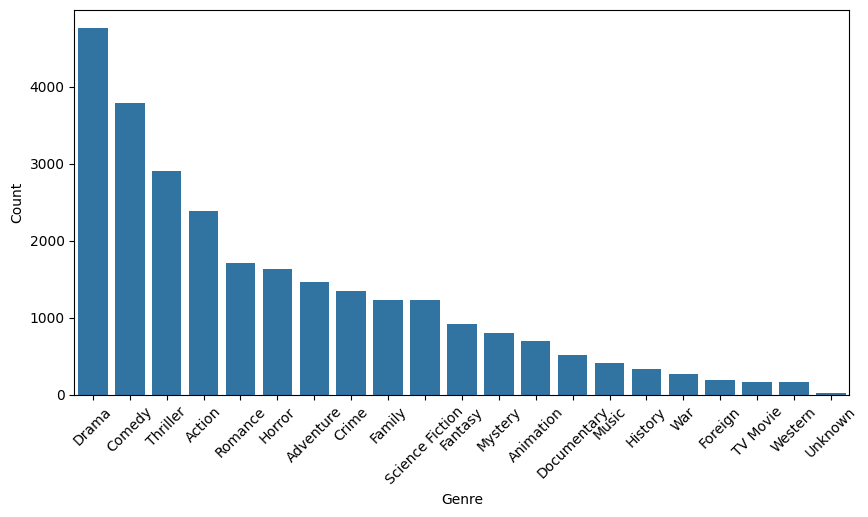

In [63]:
df = count_genres.reset_index()
df.columns = ['Genre', 'Count']
plt.figure(figsize=(10,5))  # Adjust figure size
sns.barplot(x='Genre', y='Count', data=df)
# Rotate x-axis labels if too many genres
plt.xticks(rotation=45)
# Show the plot
plt.show()